**Author: Devanshi Verma**
<br>
**Date: June-16-2020**
<br>
**Motivation: Analyse the tiping by customers taking Taxis in Chicago during COVID 19**
<br>

**import libraries and the data**

In [1]:
#importing the libraries
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
import geopandas as gpd

In [2]:
#importing data and creating seperate time and date columns
data=pd.read_csv('Data/Taxi_Trips_Dec2019-Present.csv', encoding= 'unicode_escape')
data['Trip Start Timestamp'] = pd.to_datetime(data['Trip Start Timestamp'],errors='coerce')
data['Start Date'] = data['Trip Start Timestamp'].dt.date
data['Start Month'] = data['Trip Start Timestamp'].dt.month
data['Start Time'] = data['Trip Start Timestamp'].dt.time
data['Trip End Timestamp'] = pd.to_datetime(data['Trip End Timestamp'],errors='coerce')
data['End Date'] = data['Trip End Timestamp'].dt.date
data['End Time'] = data['Trip End Timestamp'].dt.time
data.shape

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(4137294, 28)

In [3]:
data.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Start Date,Start Month,Start Time,End Date,End Time
0,e4c06ccfb0d1de5db8675fb3a2779b209760d6ac,bbf91e67201de7487dbeb23021a9a741e36d8d65175def...,2019-12-01 00:15:00,2019-12-01 00:30:00,600.0,0.1,1.703184e+10,1.703108e+10,32.0,8.0,...,-87.632746,POINT (-87.6327464887 41.8809944707),41.899156,-87.626211,POINT (-87.6262105324 41.8991556134),2019-12-01,12.0,00:15:00,2019-12-01,00:30:00
1,e1de111c0c25003054c31e0e49e9f64cc00a8683,b83ba3da1a4bc2a686d885ec2f802c3f256c518d93816c...,2019-12-01 00:15:00,2019-12-01 00:15:00,180.0,0.0,NaN,NaN,7.0,6.0,...,-87.649489,POINT (-87.6494887289 41.9226862843),41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),2019-12-01,12.0,00:15:00,2019-12-01,00:15:00
2,e0ed81be1b41bda25285afeeb76d4e4fb4be30fc,53c01ec83313fee495650d2294b7c88ade2f3d82f3acd0...,2019-12-01 00:15:00,2019-12-01 00:30:00,380.0,1.2,NaN,NaN,14.0,16.0,...,-87.721559,POINT (-87.7215590627 41.968069),41.953582,-87.723452,POINT (-87.7234523905 41.9535821253),2019-12-01,12.0,00:15:00,2019-12-01,00:30:00
3,e077d949ef075542a5168b48f9d09bd9320fd2d6,ef5e9c8f0da412a5961a77ad3da965c641e08eb1ddd19f...,2019-12-01 00:15:00,2019-12-01 00:30:00,780.0,2.0,1.703184e+10,1.703108e+10,32.0,8.0,...,-87.632746,POINT (-87.6327464887 41.8809944707),41.899156,-87.626211,POINT (-87.6262105324 41.8991556134),2019-12-01,12.0,00:15:00,2019-12-01,00:30:00
4,dfeeafe19f4fe8d71f5eadb6919b0f2fca99ee62,71cf25528ebc98e11ac91a5d359776a91874e7f6047cb8...,2019-12-01 00:15:00,2019-12-01 00:30:00,720.0,3.1,1.703128e+10,1.703107e+10,28.0,7.0,...,-87.642649,POINT (-87.642648998 41.8792550844),41.922083,-87.634156,POINT (-87.6341560931 41.922082541),2019-12-01,12.0,00:15:00,2019-12-01,00:30:00


In [6]:
#grouping the data by start dates and taking mean for the values
new_df=data.groupby(['Start Date'])['Tips'].mean()
new_df=new_df.reset_index()
new_df.head()

,Start Date,Tips
0,2019-12-01,2.433498
1,2019-12-02,2.046157
2,2019-12-03,1.855899
3,2019-12-04,1.987508
4,2019-12-05,2.100911


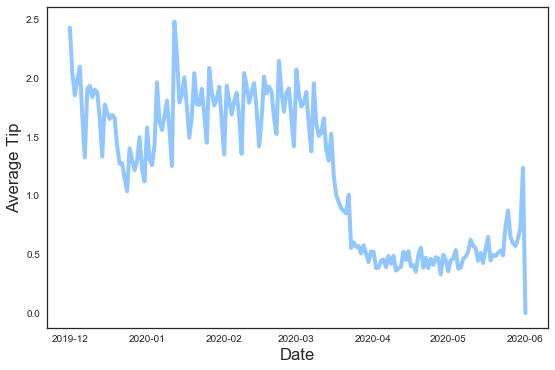

In [45]:
#plotting how the tips have changed
plt.style.use('seaborn-white')
fig,ax=plt.subplots()
ax.plot(new_df['Start Date'],new_df['Tips'])
ax.set_xlabel('Date')
ax.set_ylabel('Average Tip')
plt.savefig('Analysis/Tipping_Behaviour.png')


**Checking is the average going high on 2020-06 because of a high maximum values?**

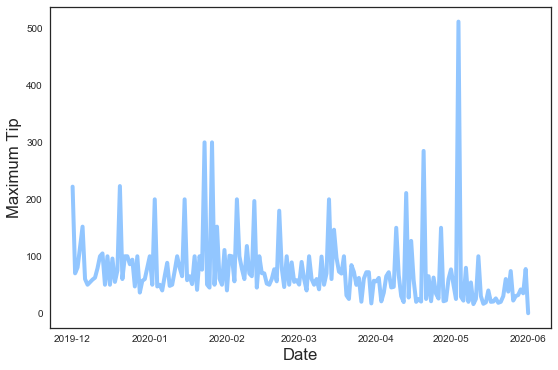

In [46]:
plt.style.use('seaborn-white')
new_df_2=data.groupby(['Start Date'])['Tips'].max()
new_df_2=new_df_2.reset_index()
fig,ax=plt.subplots()
ax.plot(new_df_2['Start Date'],new_df_2['Tips'])
ax.set_xlabel('Date')
ax.set_ylabel('Maximum Tip')
plt.savefig('Tipping_Behaviour_maximum.png')

**How has the tipping behaviour changed w.r.t to method of payment**

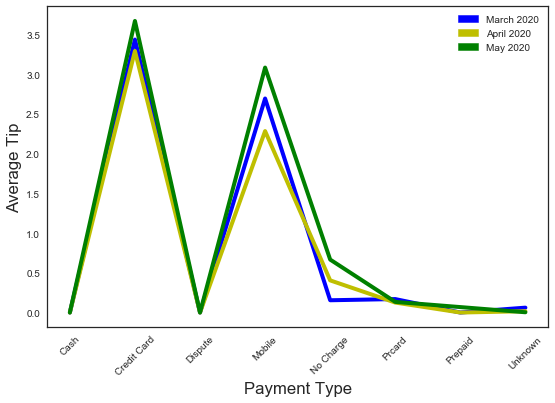

In [52]:
plt.style.use('seaborn-white')
Tips_by_paymentmethod=data.groupby(['Start Month','Payment Type'])['Tips'].mean()
Tips_by_paymentmethod=Tips_by_paymentmethod.reset_index()
March=Tips_by_paymentmethod[Tips_by_paymentmethod['Start Month']==3]
April=Tips_by_paymentmethod[Tips_by_paymentmethod['Start Month']==4]
May=Tips_by_paymentmethod[Tips_by_paymentmethod['Start Month']==5]
June=Tips_by_paymentmethod[Tips_by_paymentmethod['Start Month']==6]
fig,ax=plt.subplots()
ax.plot(March['Payment Type'],March['Tips'],color='b')
ax.plot(April['Payment Type'],April['Tips'],color='y')
ax.plot(May['Payment Type'],May['Tips'],color='g')
plt.xticks(rotation=45)
blue_patch = mpatches.Patch(color='b', label='March 2020')
Yellow_patch = mpatches.Patch(color='y', label='April 2020')
May_patch = mpatches.Patch(color='g', label='May 2020')
plt.legend(handles=[blue_patch,Yellow_patch,May_patch])
ax.set_xlabel('Payment Type')
ax.set_ylabel('Average Tip')
plt.savefig('Tipping_by_paymenttype.png')
plt.show()

**What are the hotspots?**

**After COVID19**

In [53]:
#creating for drop offs
df_march_rides_Dropoff= data[(data['Trip Start Timestamp'].dt.month >= 3) & (data['Trip Start Timestamp'].dt.month <= 6)].copy()
df_march_rides_Dropoff['count']=1
df_march_rides_Dropoff=df_march_rides_Dropoff.groupby(['Dropoff Centroid Latitude','Dropoff Centroid Longitude'])['count'].sum()
df_march_rides_Dropoff=df_march_rides_Dropoff.reset_index()
df_march_rides_Dropoff=df_march_rides_Dropoff.sort_values(by=['count'],ascending=False)
df_march_rides_Dropoff.head()

,Dropoff Centroid Latitude,Dropoff Centroid Longitude,count
158,41.880994,-87.632746,56586
191,41.899602,-87.633308,46720
161,41.884987,-87.620993,28345
290,41.944227,-87.655998,26751
146,41.874005,-87.663518,23756


In [54]:
#Plotting the intensity and the hospitals
base_map=folium.Map(location=[41.8781, -87.6298], control_scale=True, zoom_start=12)
HeatMap(data=df_march_rides_Dropoff,radius=12).add_to(base_map)
geo_df=gpd.read_file('Hospitals/Hospitals.shp')
geo_df=geo_df.to_crs('EPSG:4326')
popups, locations = [], []
for idx, row in geo_df.iterrows():
    location=[row['geometry'].y,row['geometry'].x]
    popup= '<strong>'+row['COMMONNAME']+'</strong>'
    marker=folium.Marker(location,popup=popup,icon=folium.Icon(color='red'))
    marker.add_to(base_map)
    
display(base_map)

base_map.save('hotspots_after_covid.html')    

**Before COVID**

In [ ]:
#creating maps for drop offs
df_december_rides_Dropoff= data[((data['Trip Start Timestamp'].dt.month >= 1) & (data['Trip Start Timestamp'].dt.month <= 2)) | (data['Trip Start Timestamp'].dt.month == 12)  ].copy()
df_december_rides_Dropoff['count']=1
df_december_rides_Dropoff=df_december_rides_Dropoff.groupby(['Dropoff Centroid Latitude','Dropoff Centroid Longitude'])['count'].sum()
df_december_rides_Dropoff=df_december_rides_Dropoff.reset_index()
df_december_rides_Dropoff=df_december_rides_Dropoff.sort_values(by=['count'],ascending=False)
df_december_rides_Dropoff.head()


In [ ]:
base_map2=folium.Map(location=[41.8781, -87.6298], control_scale=True, zoom_start=12)
HeatMap(data=df_december_rides_Dropoff,radius=12).add_to(base_map2)
geo_df=gpd.read_file('Hospitals/Hospitals.shp')
geo_df=geo_df.to_crs('EPSG:4326')
popups, locations = [], []
for idx, row in geo_df.iterrows():
    location=[row['geometry'].y,row['geometry'].x]
    popup= '<strong>'+row['COMMONNAME']+'</strong>'
    marker=folium.Marker(location,popup=popup,icon=folium.Icon(color='red'))
    marker.add_to(base_map2)
    
display(base_map2)

base_map2.save('Hotspots_before_covid.html')



**How has traffic at Chicago O'Hare Changed?**

In [114]:
#creating the map for march
base_map=folium.Map(location=[41.9742, -87.9073], control_scale=True, zoom_start=12)
HeatMap(data=df_march_rides_Dropoff,radius=16).add_to(base_map)
df_march_rides=df_march_rides.sort_values(by=['count'],ascending=False)
base_map.save('After_COVID_OHARE.html')
base_map

base_map2=folium.Map(location=[41.9742, -87.9073], control_scale=True, zoom_start=12)
HeatMap(data=df_december_rides_Dropoff,radius=16).add_to(base_map2)
df_december_rides_Dropoff=df_december_rides_Dropoff.sort_values(by=['count'],ascending=False)
base_map2.save('BEFORE_COVID_OHARE.html')
base_map2

